In [1]:
from PIL import Image, ImageDraw
import os
import json

dataset_path = "C:\\jupyter\\Externel_activity\\Selfdrive_segmentation\\data\\small"


In [2]:

# # 라벨별 색 지정

# class_colors = {
#     'unlabel': 0, 
#     'road': 1,
#     'sidewalk': 2,
#     'road roughness': 3,
#     'road boundaries': 4,
#     'crosswalks': 5,
#     'lane': 6,
#     'road color guide': 7,
#     'road marking': 8,
#     'parking': 9,
#     'traffic sign': 10,
#     'traffic light': 11,
#     'pole/structural object': 12,
#     'building': 13,
#     'tunnel': 14,
#     'bridge': 15,
#     'pedestrian': 16,
#     'vehicle': 17,
#     'bicycle': 18,
#     'motorcycle': 19,
#     'personal mobility': 20,
#     'dynamic': 21,
#     'vegetation': 22,
#     'sky': 23,
#     'static': 24
# }

# def create_label_image(data, image_size):
#     """다각형 데이터를 사용하여 라벨 이미지를 생성하는 함수"""
#     image = Image.new("L", tuple(image_size), 24)  # 2차원 이미지 (L 모드)로 생성
#     draw = ImageDraw.Draw(image)

#     # instance id 기준으로 Annotation 리스트 정렬 (낮은 값이 우선)
#     annotations = sorted(data['Annotation'], key=lambda x: x['instance_id'])

#     for annotation in annotations:
#         class_name = annotation['class_name']
#         color = class_colors.get(class_name, 0)  # 해당 클래스의 회색조 값 가져오기, 기본은 0 (검정색)
#         points = annotation['data'][0]  # 다각형의 점 좌표
#         polygon = [(points[i], points[i + 1]) for i in range(0, len(points), 2)]
#         draw.polygon(polygon, outline=None, fill=color)  # 외곽선 없이 채우기 색상만 지정

#     return image

# def process_case(case_path):
#     """각 케이스의 이미지와 라벨을 처리하는 함수"""
#     label_path = os.path.join(case_path, 'labels')
#     save_path = os.path.join(case_path, 'label_images')

#     if not os.path.isdir(save_path):
#         os.makedirs(save_path)

#     print(label_path)
#     label_files = os.listdir(label_path)

#     for json_name in label_files:
#         json_file_path = os.path.join(label_path, json_name)
#         with open(json_file_path, 'r') as file:
#             data = json.load(file)
#             image_size = data['image_size']
#             label_image = create_label_image(data, image_size)
#             label_image.save(os.path.join(save_path, json_name.replace('.json', '.png')))

# def main(dataset_path):
#     """데이터셋 경로에서 모든 케이스를 처리하는 메인 함수"""
#     for case in os.listdir(dataset_path):
#         case_path = os.path.join(dataset_path, case)
#         if os.path.isdir(case_path):  # validation / test / train
#             process_case(case_path)

# if __name__ == "__main__":
#     main(dataset_path) 


In [14]:
import os
os.environ['CUDA_LAUNCH_BLOCKING'] = "1"
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [15]:
from datasets import Dataset, DatasetDict, Image
import os

# 폴더 경로 설정
path=dataset_path

def get_path_list(destination):

    # 파일 경로 리스트를 저장할 리스트 초기화
    file_paths = []

    # os.walk를 사용하여 폴더 내 모든 파일을 탐색
    for root, dirs, files in os.walk(destination):
        for file in files:
            # 파일의 전체 경로를 구하고 리스트에 추가
            file_paths.append(os.path.join(root, file))
        
    return file_paths

destination=dataset_path

# your images can of course have a different extension
# semantic segmentation maps are typically stored in the png format
image_paths_train = get_path_list(os.path.join(path,"training","images"))
label_paths_train = get_path_list(os.path.join(path,"training","label_images"))

image_paths_valid = get_path_list(os.path.join(path,"validation","images"))
label_paths_valid = get_path_list(os.path.join(path,"validation","label_images"))

image_paths_test = get_path_list(os.path.join(path,"test","images"))
label_paths_test = get_path_list(os.path.join(path,"test","label_images"))

def create_dataset(image_paths, label_paths):
    dataset = Dataset.from_dict({"image": sorted(image_paths),
                                "label": sorted(label_paths)})
    dataset = dataset.cast_column("image", Image())
    dataset = dataset.cast_column("label", Image())

    return dataset

# step 1: create Dataset objects
train_dataset = create_dataset(image_paths_train, label_paths_train)
validation_dataset = create_dataset(image_paths_valid, label_paths_valid)
test_dataset = create_dataset(image_paths_test, label_paths_test)

# step 2: create DatasetDict
dataset = DatasetDict({
    "train": train_dataset,
    "valid": validation_dataset,
    "test": test_dataset
  }
)

In [16]:
train_ds = dataset["train"]
valid_ds = dataset["valid"]
test_ds = dataset["test"]

In [17]:
import json
# simple example
# id2label = {0: 'cat', 1: 'dog'}
id2label = {0:"unlabel", 1: "road", 2: "sidewalk", 3: "road roughness", 4: "road boundaries", 5: "crosswalks", 6: "lane", 7: "road color guide", 8: "road marking", 9: "parking", 10: "traffic sign", 11: "traffic light", 12: "pole/structural object", 13: "building", 14: "tunnel", 15: "bridge", 16: "pedestrian", 17: "vehicle", 18: "bicycle", 19: "motorcycle", 20: "personal mobility", 21: "dynamic", 22: "vegetation", 23: "sky", 24: "static"}

with open('id2label.json', 'w') as fp:
    json.dump(id2label, fp)

In [18]:
train_ds

Dataset({
    features: ['image', 'label'],
    num_rows: 180
})

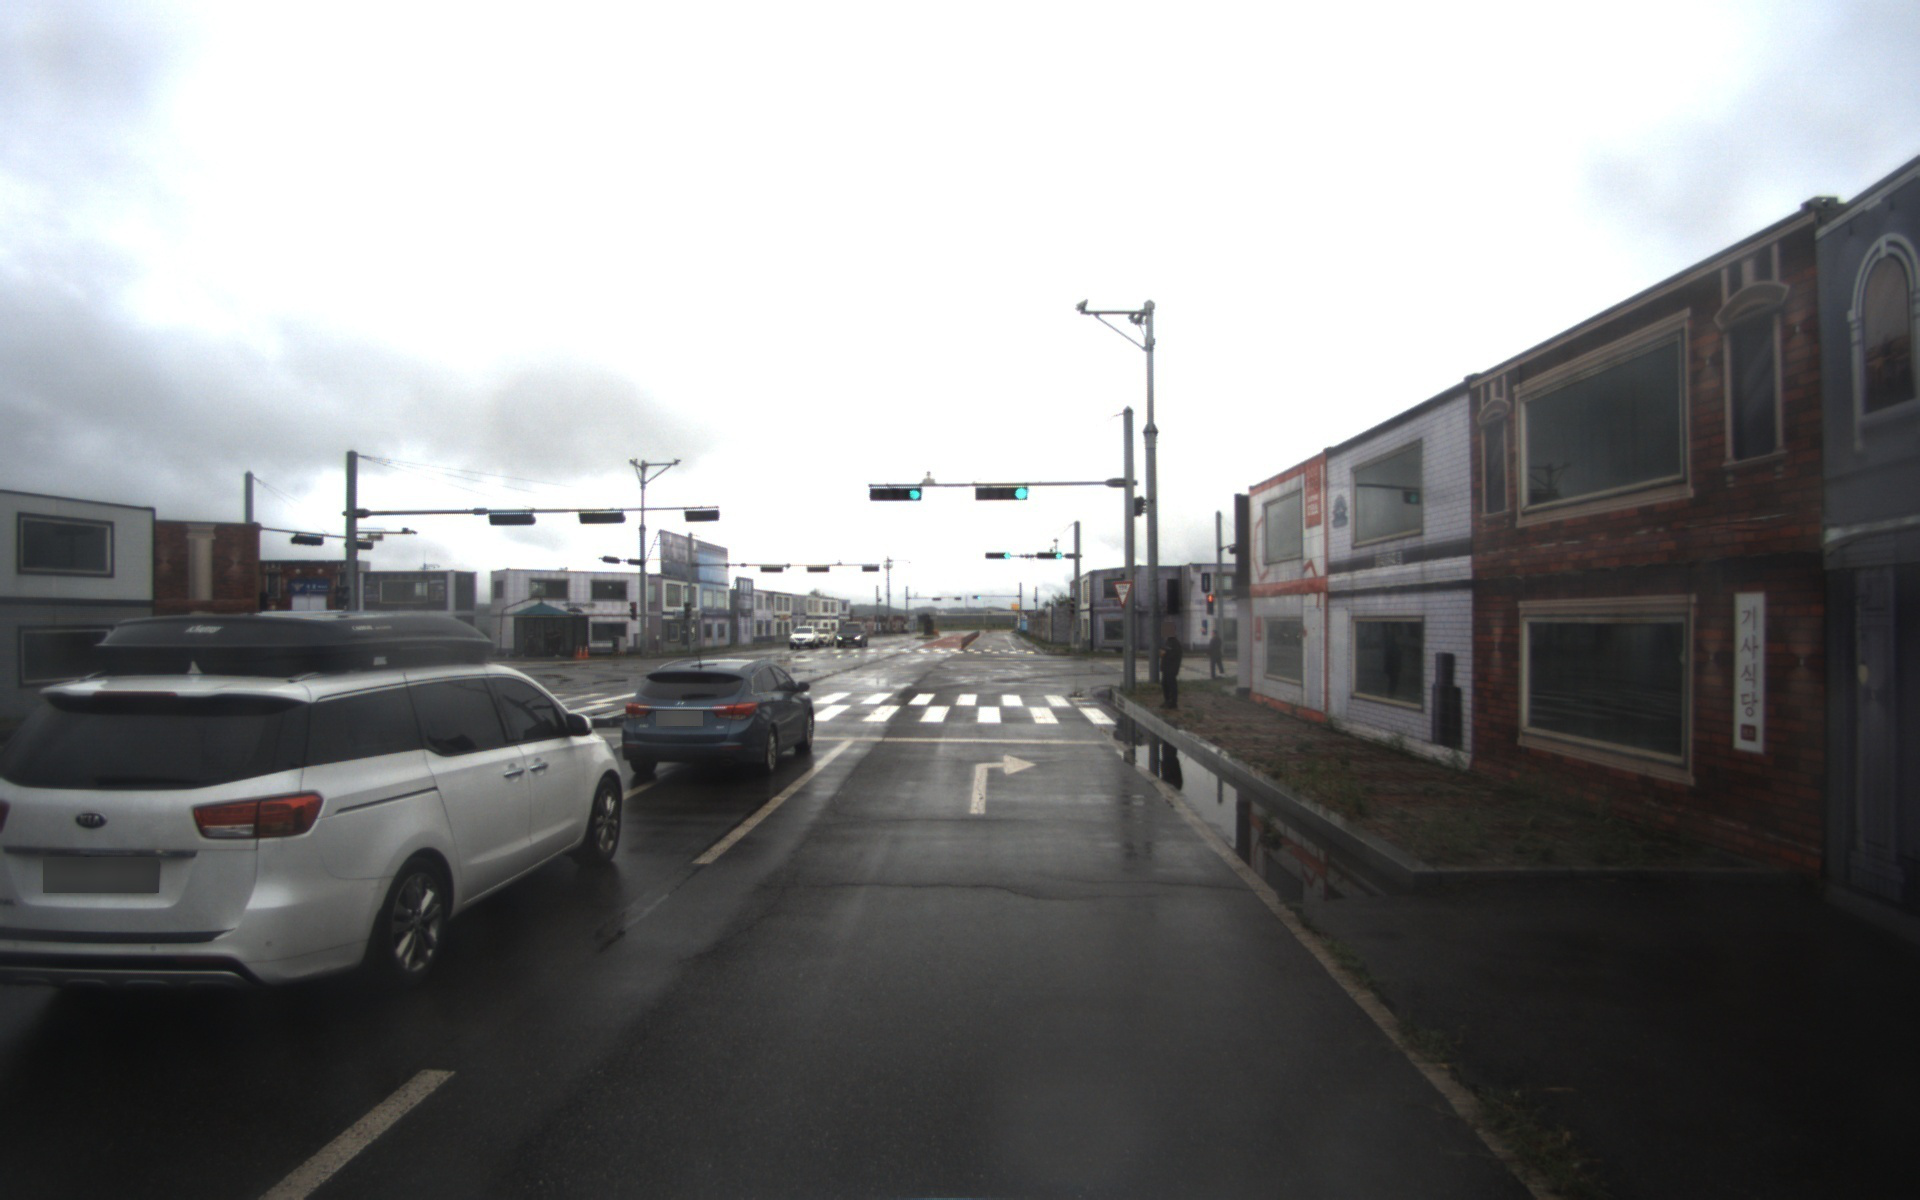

In [19]:
example = train_ds[0]
image = example['image']
image

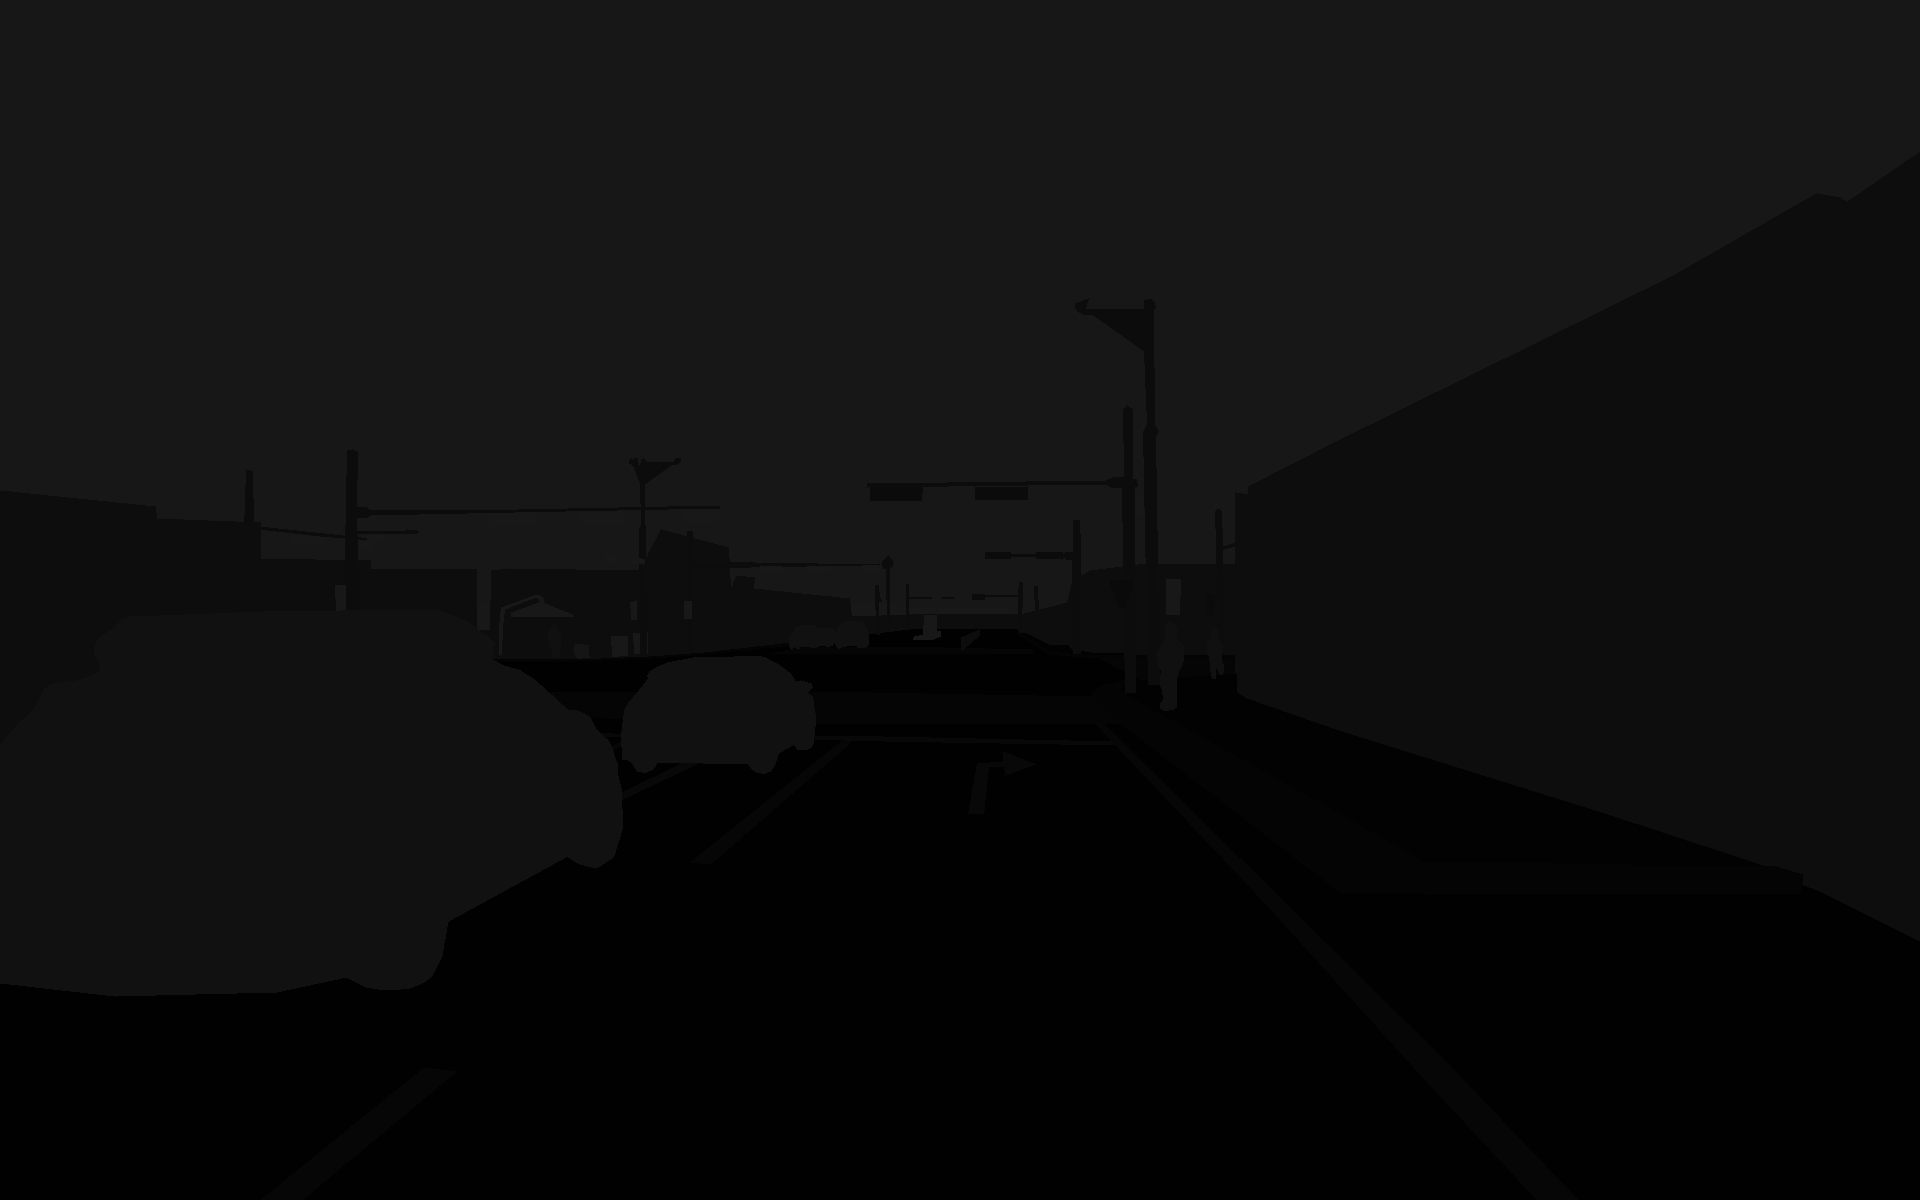

In [20]:
example['label']

In [21]:
import numpy as np

# load corresponding ground truth segmentation map, which includes a label per pixel
segmentation_map = np.array(example['label'])
print(np.array(segmentation_map).shape)
np.unique(segmentation_map)

(1200, 1920)


array([ 1,  2,  4,  5,  6,  8, 10, 11, 12, 13, 16, 17, 21, 23, 24],
      dtype=uint8)

In [22]:
import json

filename = "id2label.json"

with open(filename, 'r') as j:
     contents = json.loads(j.read())
id2label = {int(k):v for k,v in id2label.items()}
print(id2label)

{0: 'unlabel', 1: 'road', 2: 'sidewalk', 3: 'road roughness', 4: 'road boundaries', 5: 'crosswalks', 6: 'lane', 7: 'road color guide', 8: 'road marking', 9: 'parking', 10: 'traffic sign', 11: 'traffic light', 12: 'pole/structural object', 13: 'building', 14: 'tunnel', 15: 'bridge', 16: 'pedestrian', 17: 'vehicle', 18: 'bicycle', 19: 'motorcycle', 20: 'personal mobility', 21: 'dynamic', 22: 'vegetation', 23: 'sky', 24: 'static'}


In [23]:
# 위에 class_colors에서 라벨 순서대로 1~24까지 지정해서 검은색 음영으로 구분하게 하였다. 
segmentation_map

array([[23, 23, 23, ..., 23, 23, 23],
       [23, 23, 23, ..., 23, 23, 23],
       [23, 23, 23, ..., 23, 23, 23],
       ...,
       [ 1,  1,  1, ...,  1,  1,  1],
       [ 1,  1,  1, ...,  1,  1,  1],
       [ 1,  1,  1, ...,  1,  1,  1]], dtype=uint8)

In [24]:
labels = [id2label[label] for label in np.unique(segmentation_map)]
print(labels)

['road', 'sidewalk', 'road boundaries', 'crosswalks', 'lane', 'road marking', 'traffic sign', 'traffic light', 'pole/structural object', 'building', 'pedestrian', 'vehicle', 'dynamic', 'sky', 'static']


In [25]:
def color_palette():
    
    return [
    (0, 0, 0),           # unlabel
    (169, 169, 169),     # road
    (255, 255, 0),       # sidewalk
    (160, 82, 45),       # road roughness
    (255, 0, 0),         # road boundaries
    (255, 255, 255),     # crosswalks
    (255, 20, 147),      # lane
    (255, 192, 203),     # road color guide
    (218, 112, 214),     # road marking
    (70, 130, 180),      # parking
    (0, 255, 255),       # traffic sign
    (255, 69, 0),        # traffic light
    (139, 69, 19),       # pole/structural object
    (255, 165, 0),       # building
    (46, 139, 87),       # tunnel
    (205, 133, 63),      # bridge
    (0, 0, 255),         # pedestrian
    (128, 0, 128),       # vehicle
    (106, 90, 205),      # bicycle
    (255, 140, 0),       # motorcycle
    (72, 61, 139),       # personal mobility
    (0, 0, 0),           # dynamic
    (34, 139, 34),       # vegetation
    (135, 206, 235),     # sky
    (128, 128, 128)      # static
]

palette = color_palette()

In [26]:
len(palette)

25

In [27]:
np.unique(segmentation_map)

array([ 1,  2,  4,  5,  6,  8, 10, 11, 12, 13, 16, 17, 21, 23, 24],
      dtype=uint8)

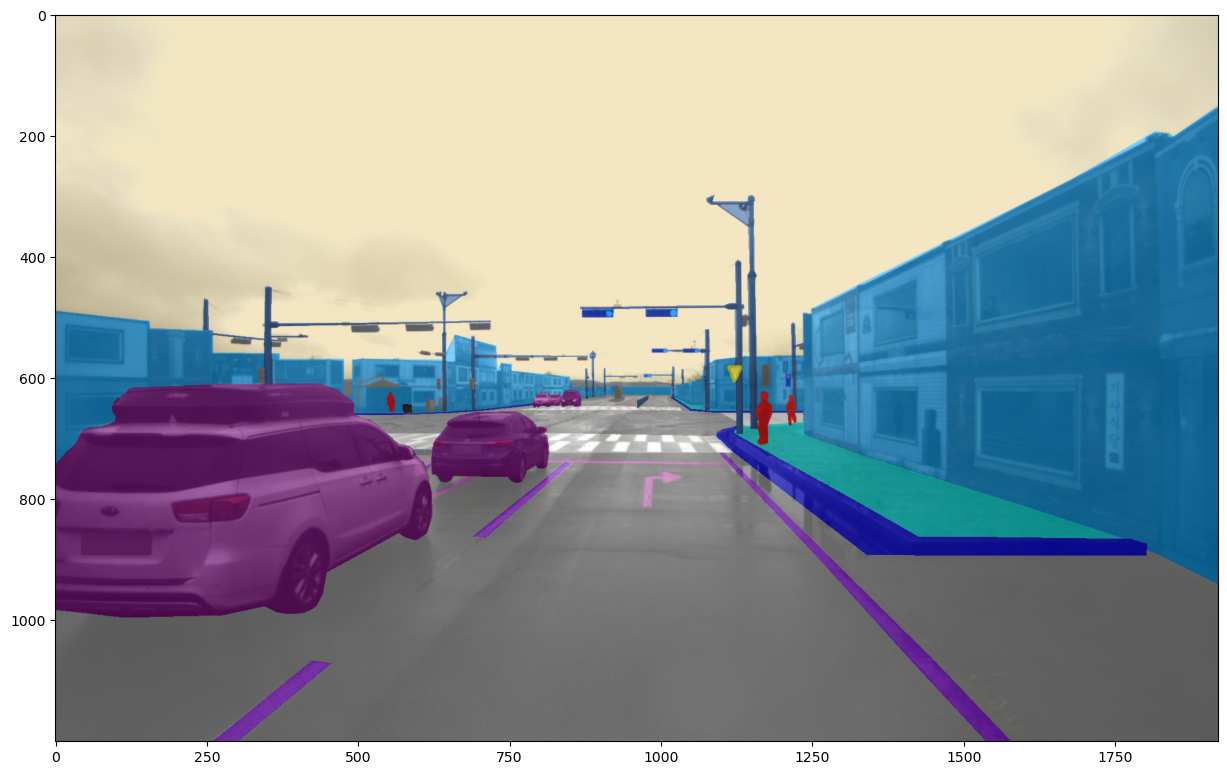

In [28]:
import numpy as np
import matplotlib.pyplot as plt

color_segmentation_map = np.zeros((segmentation_map.shape[0], segmentation_map.shape[1], 3), dtype=np.uint8) # height, width, 3

# print(color_segmentation_map)

for label, color in enumerate(palette):
    color_segmentation_map[segmentation_map == label, :] = color
# Convert to BGR
ground_truth_color_seg = color_segmentation_map[..., ::-1]

img = np.array(image) * 0.5 + ground_truth_color_seg * 0.5
img = img.astype(np.uint8)

plt.figure(figsize=(15, 10))
plt.imshow(img)
plt.show()

In [29]:
import numpy as np
from torch.utils.data import Dataset

class ImageSegmentationDataset(Dataset):
    """Image segmentation dataset."""

    def __init__(self, dataset, transform):
        """
        Args:
            dataset
        """
        self.dataset = dataset
        self.transform = transform
        
    def __len__(self):
        return len(self.dataset)
    
    def __getitem__(self, idx):
        original_image = np.array(self.dataset[idx]['image'])
        original_segmentation_map = np.array(self.dataset[idx]['label'])
        
        transformed = self.transform(image=original_image, mask=original_segmentation_map)
        image, segmentation_map = transformed['image'], transformed['mask']

        # convert to C, H, W
        image = image.transpose(2,0,1)

        return image, segmentation_map, original_image, original_segmentation_map

In [30]:
import albumentations as A
import numpy as np

# ADE_MEAN과 ADE_STD를 리스트로 변환
ADE_MEAN = (np.array([123.675, 116.280, 103.530]) / 255).tolist()
ADE_STD = (np.array([58.395, 57.120, 57.375]) / 255).tolist()

train_transform = A.Compose([
    A.LongestMaxSize(max_size=1333),
    A.RandomCrop(width=512, height=512),
    A.HorizontalFlip(p=0.5),
    A.Normalize(mean=ADE_MEAN, std=ADE_STD),
])

test_transform = A.Compose([
    A.Resize(width=512, height=512),
    A.Normalize(mean=ADE_MEAN, std=ADE_STD),
])

train_dataset = ImageSegmentationDataset(train_ds, transform=train_transform)
valid_dataset = ImageSegmentationDataset(valid_ds, transform=test_transform)
test_dataset = ImageSegmentationDataset(test_ds, transform=test_transform)


In [31]:
train_dataset[0]

(array([[[ 2.2489083 ,  2.2489083 ,  2.2489083 , ...,  2.2489083 ,
           2.2489083 ,  2.2489083 ],
         [ 2.2489083 ,  2.2489083 ,  2.2489083 , ...,  2.2489083 ,
           2.2489083 ,  2.2489083 ],
         [ 2.2489083 ,  2.2489083 ,  2.2489083 , ...,  2.2489083 ,
           2.2489083 ,  2.2489083 ],
         ...,
         [-1.6384108 , -1.621286  , -1.6384108 , ..., -1.0904187 ,
          -1.1075435 , -1.0904187 ],
         [-1.6555356 , -1.6384108 , -1.6384108 , ..., -1.0561693 ,
          -1.0732939 , -1.0732939 ],
         [-1.6384108 , -1.6384108 , -1.6041614 , ..., -1.0561693 ,
          -1.0561693 , -1.0390445 ]],
 
        [[ 2.4285712 ,  2.4285712 ,  2.4285712 , ...,  2.4285712 ,
           2.4285712 ,  2.4285712 ],
         [ 2.4285712 ,  2.4285712 ,  2.4285712 , ...,  2.4285712 ,
           2.4285712 ,  2.4285712 ],
         [ 2.4285712 ,  2.4285712 ,  2.4285712 , ...,  2.4285712 ,
           2.4285712 ,  2.4285712 ],
         ...,
         [-1.5805321 , -1.5630251

In [33]:
# Verify
image, segmentation_map, original_image, original_segmentation_map = train_dataset[0]
print(image.shape)
print(segmentation_map.shape)

(3, 512, 512)
(512, 512)


In [34]:
original_segmentation_map.shape

(1200, 1920)

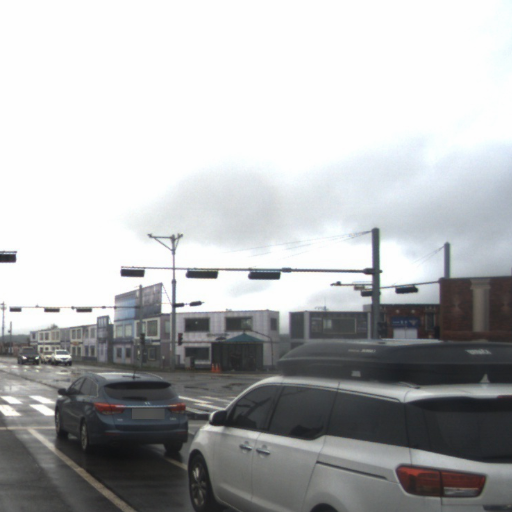

In [36]:
from PIL import Image

unnormalized_image = (image * np.array(ADE_STD)[:, None, None]) + np.array(ADE_MEAN)[:, None, None]
unnormalized_image = (unnormalized_image * 255).astype(np.uint8)
unnormalized_image = np.moveaxis(unnormalized_image, 0, -1)
Image.fromarray(unnormalized_image)

In [37]:
segmentation_map.shape

(512, 512)

In [38]:
labels = [id2label[label] for label in np.unique(segmentation_map)]
print(labels)

['road', 'road boundaries', 'crosswalks', 'lane', 'road marking', 'traffic light', 'pole/structural object', 'building', 'pedestrian', 'vehicle', 'dynamic', 'sky', 'static']


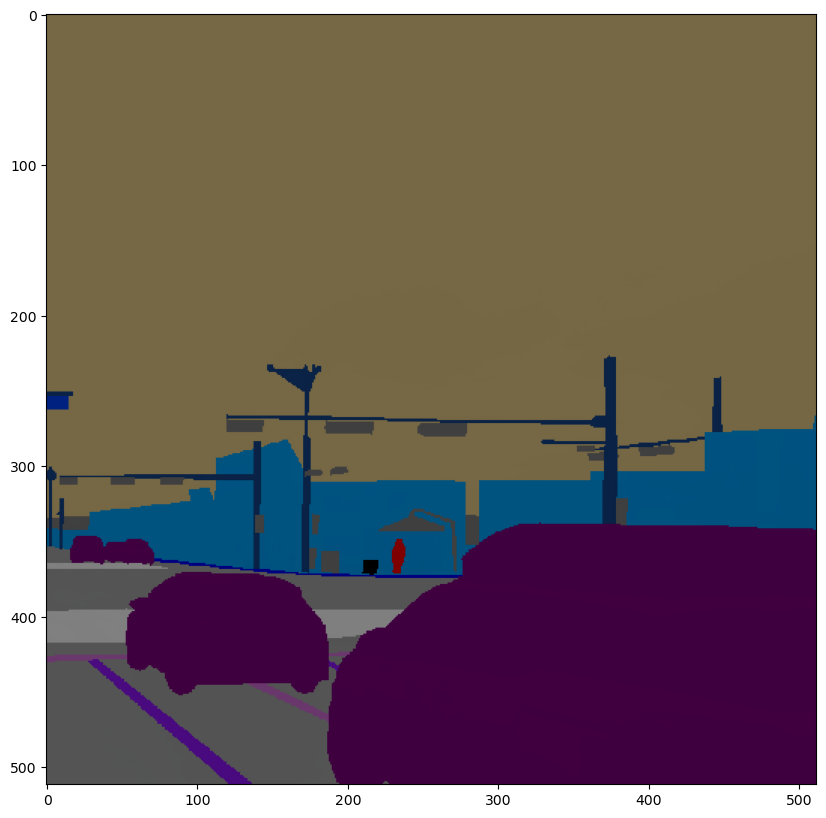

In [39]:
import numpy as np
import matplotlib.pyplot as plt

color_segmentation_map = np.zeros((segmentation_map.shape[0], segmentation_map.shape[1], 3), dtype=np.uint8) # height, width, 3
for label, color in enumerate(palette):
    color_segmentation_map[segmentation_map == label, :] = color
# Convert to BGR
ground_truth_color_seg = color_segmentation_map[..., ::-1]

img = np.moveaxis(image, 0, -1) * 0.5 + ground_truth_color_seg * 0.5
img = img.astype(np.uint8)

plt.figure(figsize=(15, 10))
plt.imshow(img)
plt.show()

In [40]:
from transformers import MaskFormerImageProcessor

# Create a preprocessor
preprocessor = MaskFormerImageProcessor(ignore_index=0, reduce_labels=False, do_resize=False, do_rescale=False, do_normalize=False)

c:\Users\jaemin\Anaconda3\envs\jm\lib\site-packages\transformers\models\maskformer\image_processing_maskformer.py:422: FutureWarning: The `reduce_labels` argument is deprecated and will be removed in v4.27. Please use `do_reduce_labels` instead.
  FutureWarning,


In [41]:
from torch.utils.data import DataLoader

def collate_fn(batch):
    inputs = list(zip(*batch))
    images = inputs[0]
    segmentation_maps = inputs[1]
    # this function pads the inputs to the same size,
    # and creates a pixel mask
    # actually padding isn't required here since we are cropping
    batch = preprocessor(
        images,
        segmentation_maps=segmentation_maps,
        return_tensors="pt",
    )

    batch["original_images"] = inputs[2]
    batch["original_segmentation_maps"] = inputs[3]
    
    return batch

train_dataloader = DataLoader(train_dataset, batch_size=2, shuffle=True, collate_fn=collate_fn)
valid_dataloader = DataLoader(train_dataset, batch_size=2, shuffle=True, collate_fn=collate_fn)
test_dataloader = DataLoader(test_dataset, batch_size=2, shuffle=False, collate_fn=collate_fn)

In [42]:
import torch

batch = next(iter(train_dataloader))
for k,v in batch.items():
  if isinstance(v, torch.Tensor):
    print(k,v.shape)
  else:
    print(k,v[0].shape)

pixel_values torch.Size([2, 3, 512, 512])
pixel_mask torch.Size([2, 512, 512])
mask_labels torch.Size([14, 512, 512])
class_labels torch.Size([14])
original_images (1200, 1920, 3)
original_segmentation_maps (1200, 1920)


In [43]:
pixel_values = batch["pixel_values"][0].numpy()
pixel_values.shape

(3, 512, 512)

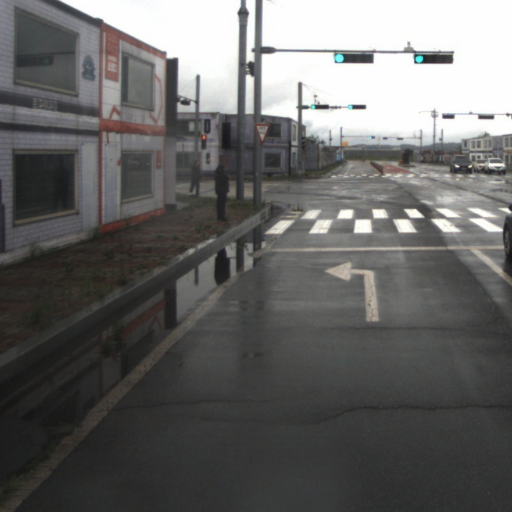

In [44]:
unnormalized_image = (pixel_values * np.array(ADE_STD)[:, None, None]) + np.array(ADE_MEAN)[:, None, None]
unnormalized_image = (unnormalized_image * 255).astype(np.uint8)
unnormalized_image = np.moveaxis(unnormalized_image, 0, -1)
Image.fromarray(unnormalized_image)

In [45]:
# verify class labels
labels = [id2label[label] for label in batch["class_labels"][0].tolist()]
print(labels)

['road', 'sidewalk', 'road boundaries', 'crosswalks', 'lane', 'road marking', 'traffic sign', 'traffic light', 'pole/structural object', 'building', 'pedestrian', 'vehicle', 'sky', 'static']


In [46]:
# verify mask labels
batch["mask_labels"][0].shape

torch.Size([14, 512, 512])

In [47]:
def visualize_mask(labels, label_name):
  print("Label:", label_name)
  idx = labels.index(label_name)

  visual_mask = (batch["mask_labels"][0][idx].bool().numpy() * 255).astype(np.uint8)
  return Image.fromarray(visual_mask)

Label: lane


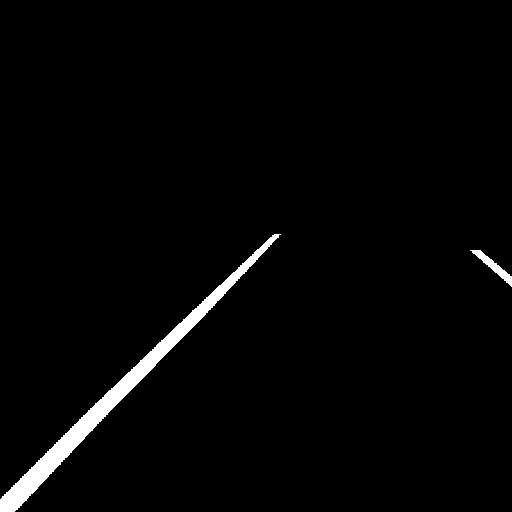

In [48]:
visualize_mask(labels, "lane")

In [56]:
from transformers import MaskFormerForInstanceSegmentation

# Replace the head of the pre-trained model
model = MaskFormerForInstanceSegmentation.from_pretrained("facebook/maskformer-swin-base-ade",
                                                          id2label=id2label,
                                                          ignore_mismatched_sizes=True)



model.load_state_dict(torch.load("c:\\Users\\jaemin\\Downloads\\trained_model.pth"))

Some weights of MaskFormerForInstanceSegmentation were not initialized from the model checkpoint at facebook/maskformer-swin-base-ade and are newly initialized because the shapes did not match:
- class_predictor.weight: found shape torch.Size([151, 256]) in the checkpoint and torch.Size([26, 256]) in the model instantiated
- class_predictor.bias: found shape torch.Size([151]) in the checkpoint and torch.Size([26]) in the model instantiated
- criterion.empty_weight: found shape torch.Size([151]) in the checkpoint and torch.Size([26]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <module>:10                                                                                   │
│                                                                                                  │
│    7                                                                                             │
│    8                                                                                             │
│    9                                                                                             │
│ ❱ 10 model.load_state_dict(torch.load("c:\\Users\\jaemin\\Downloads\\trained_model.pth"))        │
│   11                                                                                             │
│                                                                                                  │
│ c:\Users\jaemin\Anaconda3\envs\jm\lib\site-packages\torch\serialization.py:608 in load           │
│                                                                                                  │
│   605 │   │   │   │   │   opened_file.seek(orig_position)                                        │
│   606 │   │   │   │   │   return torch.jit.load(opened_file)                                     │
│   607 │   │   │   │   return _load(opened_zipfile, map_location, pickle_module, **pickle_load_   │
│ ❱ 608 │   │   return _legacy_load(opened_file, map_location, pickle_module, **pickle_load_args   │
│   609                                                                                            │
│   610                                                                                            │
│   611 # Register pickling support for layout instances such as                                   │
│                                                                                                  │
│ c:\Users\jaemin\Anaconda3\envs\jm\lib\site-packages\torch\serialization.py:777 in _legacy_load   │
│                                                                                                  │
│   774 │   │   │   f"Received object of type \"{type(f)}\". Please update to Python 3.8.2 or ne   │
│   775 │   │   │   "functionality.")                                                              │
│   776 │                                                                                          │
│ ❱ 777 │   magic_number = pickle_module.load(f, **pickle_load_args)                               │
│   778 │   if magic_number != MAGIC_NUMBER:                                                       │
│   779 │   │   raise RuntimeError("Invalid magic number; corrupt file?")                          │
│   780 │   protocol_version = pickle_module.load(f, **pickle_load_args)                           │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
EOFError: Ran out of input

In [30]:
outputs = model(batch["pixel_values"],
                class_labels=batch["class_labels"],
                mask_labels=batch["mask_labels"])

In [31]:
outputs.loss

tensor([4.9897], grad_fn=<AddBackward0>)

In [32]:
import evaluate

metric = evaluate.load("mean_iou")

In [33]:
import torch
from tqdm.auto import tqdm

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

optimizer = torch.optim.Adam(model.parameters(), lr=5e-5)

running_loss = 0.0
num_samples = 0
for epoch in range(100):
  print("Epoch:", epoch)
  model.train()
  for idx, batch in enumerate(tqdm(train_dataloader)):
      # Reset the parameter gradients
      optimizer.zero_grad()

      # Forward pass
      outputs = model(
          pixel_values=batch["pixel_values"].to(device),
          mask_labels=[labels.to(device) for labels in batch["mask_labels"]],
          class_labels=[labels.to(device) for labels in batch["class_labels"]],
      )

      # Backward propagation
      loss = outputs.loss
      loss.backward()

      batch_size = batch["pixel_values"].size(0)
      running_loss += loss.item()
      num_samples += batch_size

      if idx % 100 == 0:
        print("Loss:", running_loss/num_samples)

      # Optimization
      optimizer.step()

  model.eval()
  for idx, batch in enumerate(tqdm(test_dataloader)):
    if idx > 5:
      break

    pixel_values = batch["pixel_values"]
    
    # Forward pass
    with torch.no_grad():
      outputs = model(pixel_values=pixel_values.to(device))

    # get original images
    original_images = batch["original_images"]
    target_sizes = [(image.shape[0], image.shape[1]) for image in original_images]
    # predict segmentation maps
    predicted_segmentation_maps = preprocessor.post_process_semantic_segmentation(outputs,
                                                                                  target_sizes=target_sizes)

    # get ground truth segmentation maps
    ground_truth_segmentation_maps = batch["original_segmentation_maps"]

    metric.add_batch(references=ground_truth_segmentation_maps, predictions=predicted_segmentation_maps)
  
  # NOTE this metric outputs a dict that also includes the mIoU per category as keys
  # so if you're interested, feel free to print them as well
  print("Mean IoU:", metric.compute(num_labels = len(id2label), ignore_index = 0)['mean_iou'])

Epoch: 0


  0%|          | 0/90 [00:00<?, ?it/s]

Loss: 2.139005422592163


  0%|          | 0/60 [00:00<?, ?it/s]

c:\Users\jaemin\Anaconda3\envs\jm\lib\site-packages\datasets\features\image.py:334: UserWarning: Downcasting array dtype int64 to int32 to be compatible with 'Pillow'
  warnings.warn(f"Downcasting array dtype {dtype} to {dest_dtype} to be compatible with 'Pillow'")


Mean IoU: 0.5229502749723642
Epoch: 1


C:\Users\jaemin\.cache\huggingface\modules\evaluate_modules\metrics\evaluate-metric--mean_iou\9e450724f21f05592bfb0255fe2fa576df8171fa060d11121d8aecfff0db80d0\mean_iou.py:259: RuntimeWarning: invalid value encountered in true_divide
  iou = total_area_intersect / total_area_union
C:\Users\jaemin\.cache\huggingface\modules\evaluate_modules\metrics\evaluate-metric--mean_iou\9e450724f21f05592bfb0255fe2fa576df8171fa060d11121d8aecfff0db80d0\mean_iou.py:260: RuntimeWarning: invalid value encountered in true_divide
  acc = total_area_intersect / total_area_label


  0%|          | 0/90 [00:00<?, ?it/s]

Loss: 0.8210295609065464


In [49]:
# let's take the first test batch
batch = next(iter(test_dataloader))
for k,v in batch.items():
  if isinstance(v, torch.Tensor):
    print(k,v.shape)
  else:
    print(k,len(v))

pixel_values torch.Size([2, 3, 512, 512])
pixel_mask torch.Size([2, 512, 512])
mask_labels 2
class_labels 2
original_images 2
original_segmentation_maps 2


In [54]:
import joblib 
model = joblib.load('C:\\jupyter\\Externel_activity\\Selfdrive_segmentation\\tutorial\\model_save\\data.pkl')


UnpicklingError: unsupported persistent id encountered

In [ ]:
# forward pass
with torch.no_grad():
  outputs = model(batch["pixel_values"].to(device))

In [ ]:
original_images = batch["original_images"]
target_sizes = [(image.shape[0], image.shape[1]) for image in original_images]
# predict segmentation maps
predicted_segmentation_maps = preprocessor.post_process_semantic_segmentation(outputs, target_sizes=target_sizes)

In [ ]:
image = batch["original_images"][0]
Image.fromarray(image)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

segmentation_map = predicted_segmentation_maps[0].cpu().numpy()

color_segmentation_map = np.zeros((segmentation_map.shape[0], segmentation_map.shape[1], 3), dtype=np.uint8) # height, width, 3
for label, color in enumerate(palette):
    color_segmentation_map[segmentation_map == label, :] = color
# Convert to BGR
ground_truth_color_seg = color_segmentation_map[..., ::-1]

img = image * 0.5 + ground_truth_color_seg * 0.5
img = img.astype(np.uint8)

plt.figure(figsize=(15, 10))
plt.imshow(img)
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

segmentation_map = batch["original_segmentation_maps"][0]

color_segmentation_map = np.zeros((segmentation_map.shape[0], segmentation_map.shape[1], 3), dtype=np.uint8) # height, width, 3
for label, color in enumerate(palette):
    color_segmentation_map[segmentation_map == label, :] = color
# Convert to BGR
ground_truth_color_seg = color_segmentation_map[..., ::-1]

img = image * 0.5 + ground_truth_color_seg * 0.5
img = img.astype(np.uint8)

plt.figure(figsize=(15, 10))
plt.imshow(img)
plt.show()

In [ ]:
ddddddddddd